# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка: 10__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

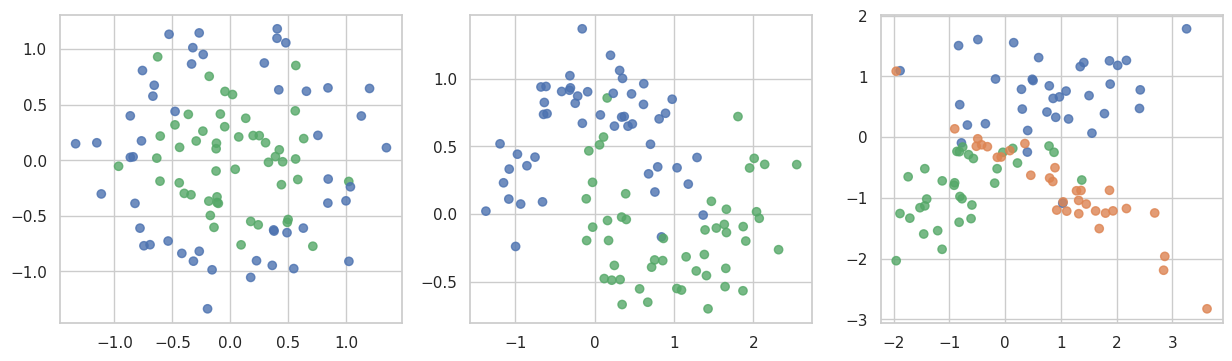

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

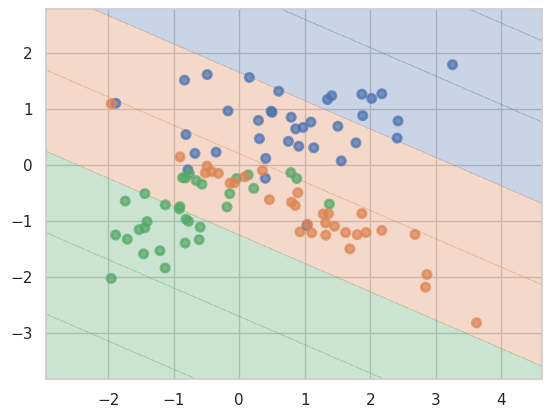

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def tree_plot(dataset, max_depth = None, min_samples_leaf = None):
  X, y = dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if (max_depth != None) and (min_samples_leaf != None):
    regr = DecisionTreeClassifier(random_state=42, max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
  else:
    regr = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
  plot_surface(regr, X_test, y_test)
  plt.text(-2, 2, f'train accuracy: {np.round(accuracy_score(regr.predict(X_train), y_train), 3)}\n test accuracy:{np.round(accuracy_score(regr.predict(X_test), y_test), 3)}', fontsize=8, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

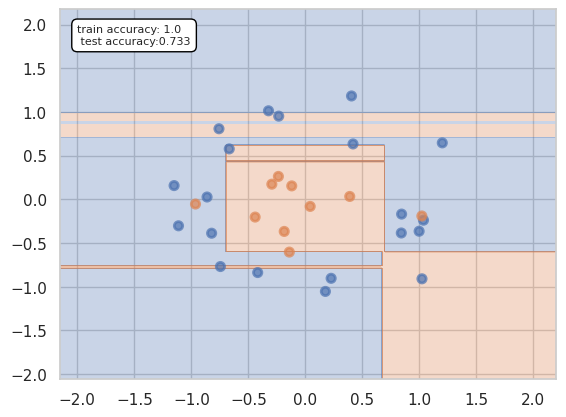

In [8]:
tree_plot(datasets[0])

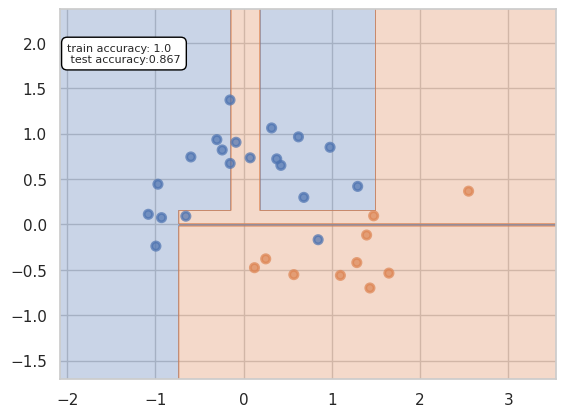

In [9]:
tree_plot(datasets[1])

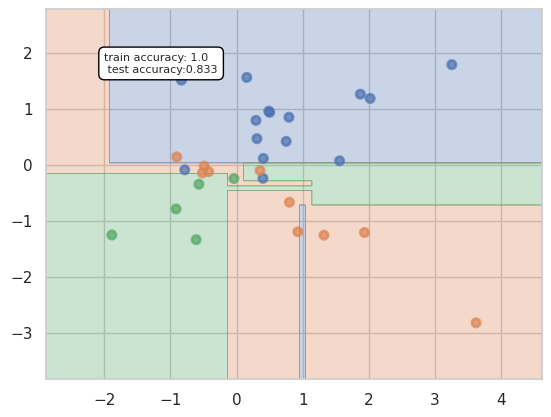

In [10]:
tree_plot(datasets[2])

__Ответ:__ Несмотря на то, что показатели accuracy не маленькие (от 0.7 и выше), видно, что модель переобучается, т.к. она сильно делит плоскость (очень много областей, многие из которых очень узкие и вытянутые - имеют маленькую площадь)

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [11]:
def tree_plot_grid(dataset):
  plt.figure(figsize = (14, 10))
  for i, max_depth in enumerate([1, 2, 4, 8]):
    for j, min_samples_leaf in enumerate([1, 2, 3, 4]):
        plt.subplot2grid((4, 4), (i, j))
        tree_plot(dataset, max_depth, min_samples_leaf)
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

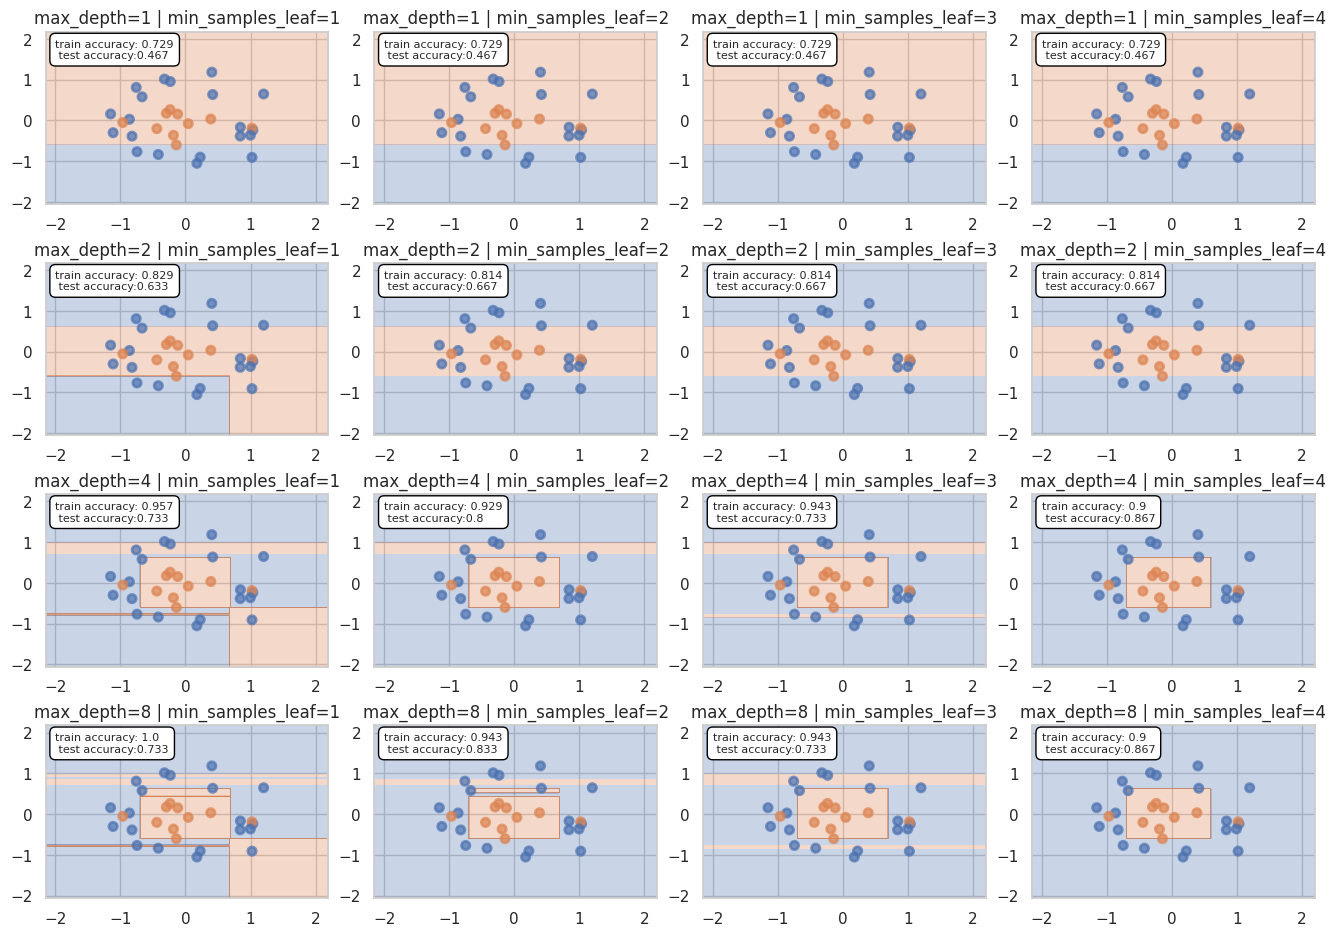

In [12]:
tree_plot_grid(datasets[0])

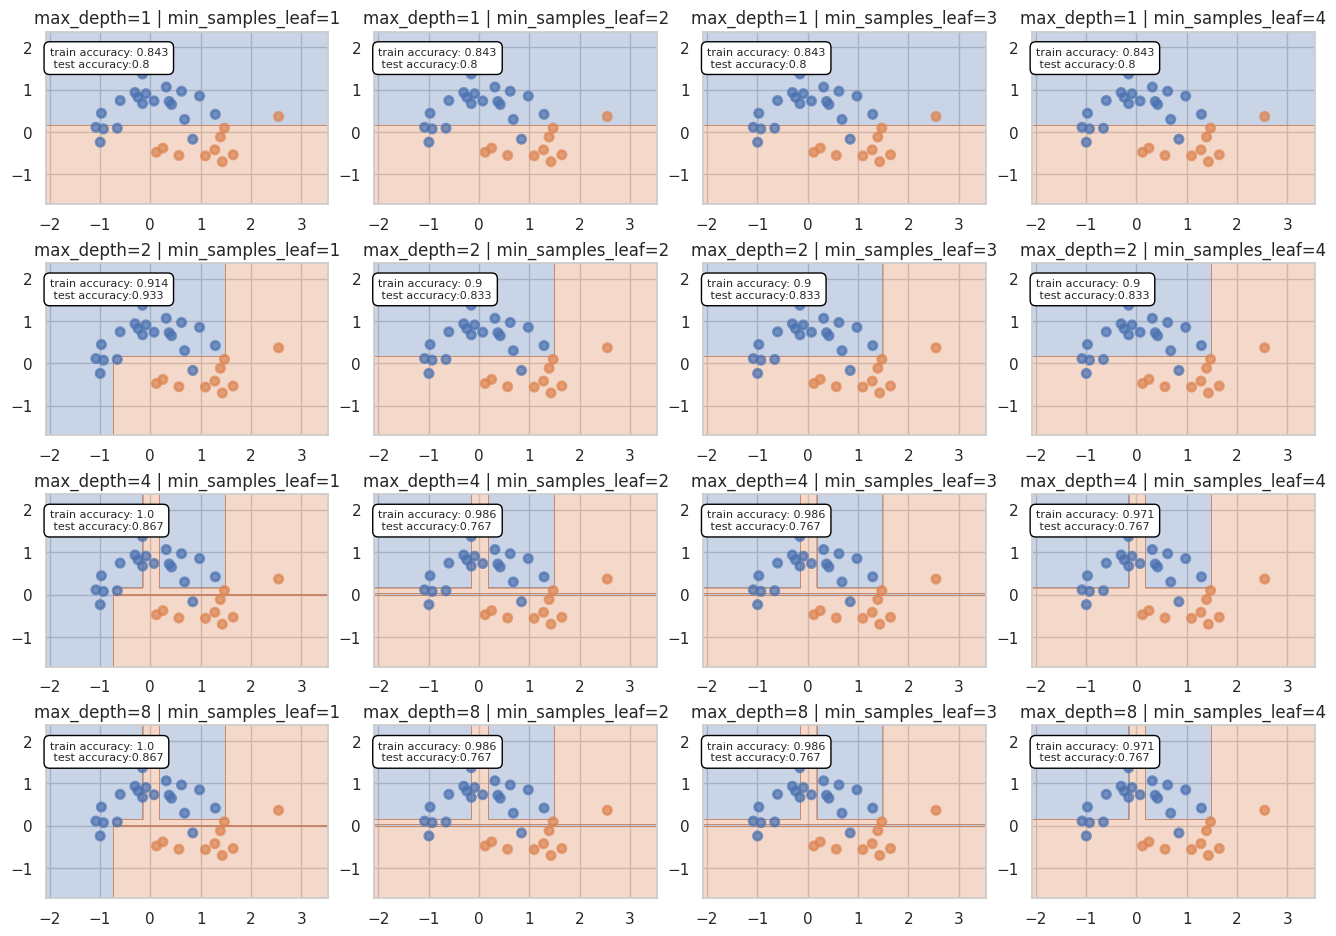

In [13]:
tree_plot_grid(datasets[1])

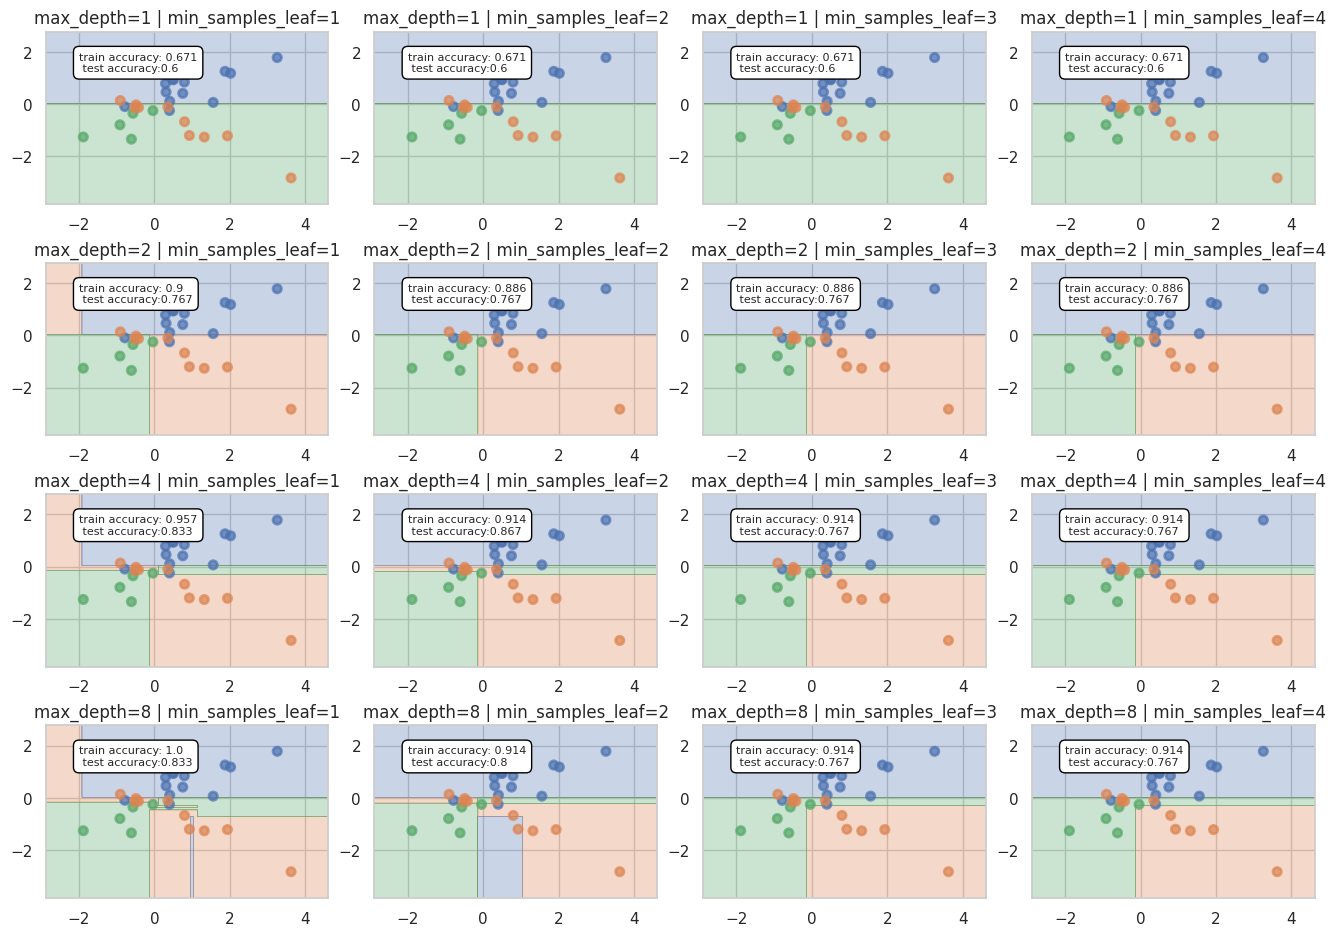

In [14]:
tree_plot_grid(datasets[2])

__Ответ:__ при увеличении глубины дерева accuracy на трейне растет, а на тесте падает - модель переобучается - это видно и из разделяющей поверхности на всех трех датасетах. Увеличение минимального количества значений в листе не улучшает метрику, но разбиение становится более обобщающее, что явно положительно влияет на модель

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/102620112/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
from hw5code import *

In [16]:
students = pd.read_csv('students.csv')

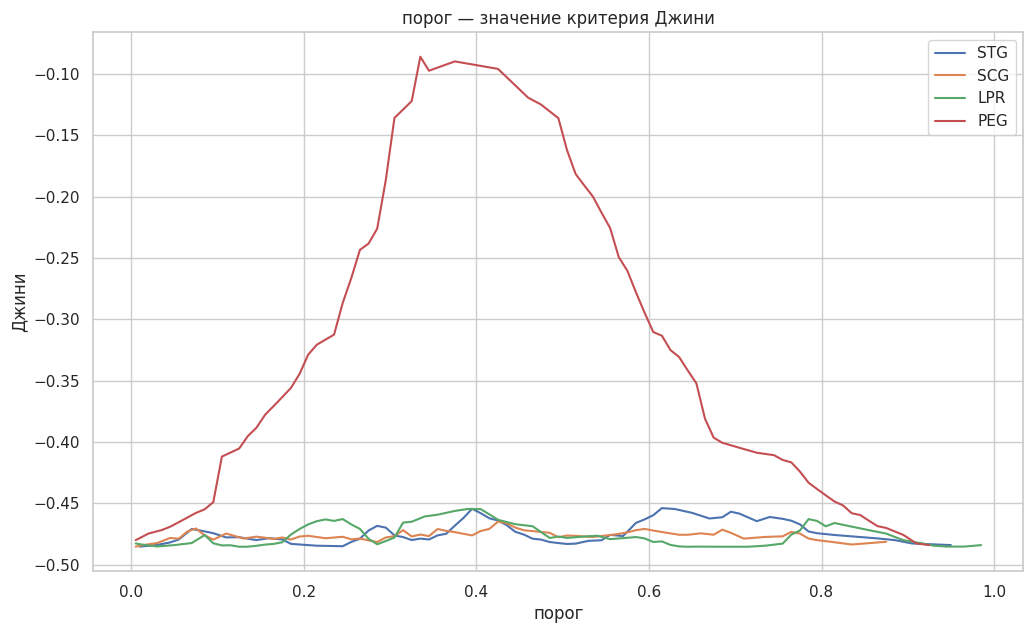

In [17]:
columns = ['STG', 'SCG', 'LPR', 'PEG']
plt.figure(figsize = (12, 7))
for column in columns:
  thresholds, ginis, threshold_best, gini_best = find_best_split(students[column], students['UNS'])
  plt.plot(thresholds, ginis, label = column)
plt.title("порог — значение критерия Джини")
plt.xlabel("порог")
plt.ylabel("Джини")
plt.legend()
plt.show()

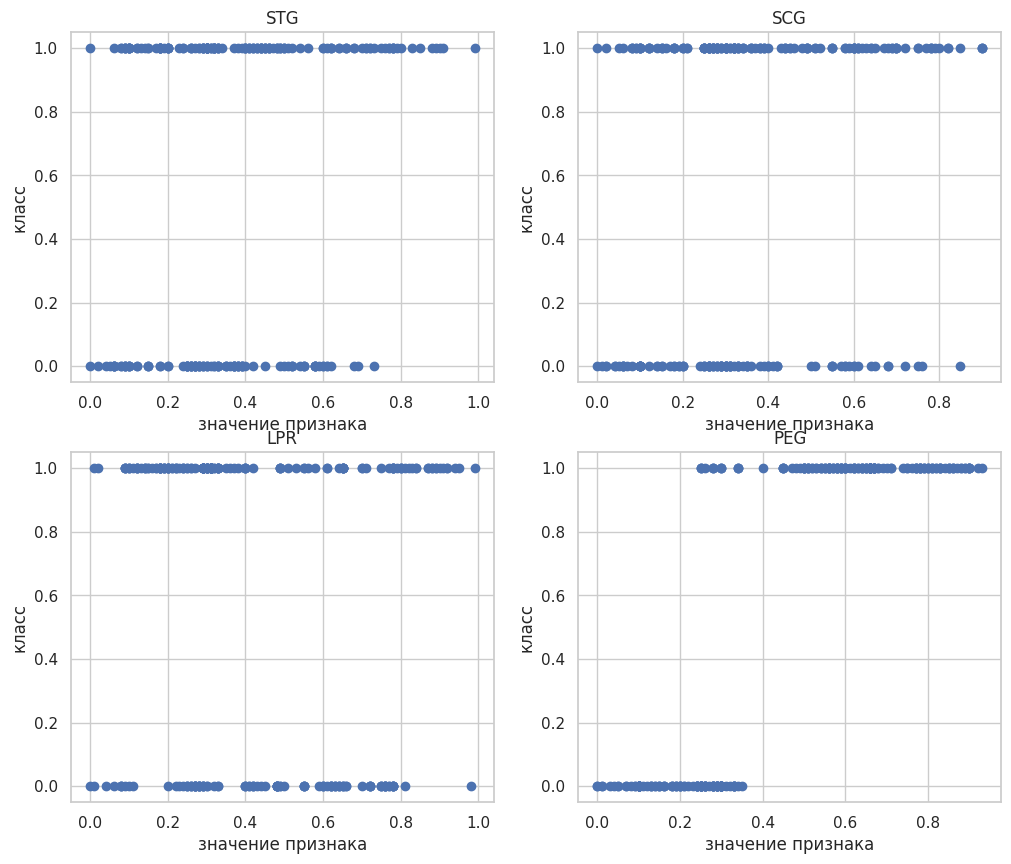

In [18]:
plt.figure(figsize = (12, 10))
for i, column in enumerate(columns):
  plt.subplot(2, 2, i + 1)
  plt.scatter(students[column], students['UNS'])
  plt.title(f"{column}")
  plt.xlabel('значение признака')
  plt.ylabel('класс')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Нужно делать разделение по PEG, т.к. наибольшее значение критерия Джинни достигается в нем. Выборка делится почти идеально, когда есть такой порог, при котором в один лист идет почти полностью один класс, а в другую другой. В таком случае значение Джини критерия будет около 0, а кривая имела бы ярковыраженный максимум и была бы горообразной. На диаграмме рассеивания хорошо видно, что можно поделить значения на две части, в каждой из которых будут значительно преобладать объекты опредленного класса - например, PEG. Деление практически невозможно в том случае, когда на диаграмме рассеивания классы объектов постоянно чередуются и нельзя нормально разделить выборки на две части, из-за чего кривая не имеет ярковыраженных максимумов и вообще похоже на зашумленную горизонтальную прямую

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/56884/run-report/102713174/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [19]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("agaricus-lepiota.data")
df = df.apply(LabelEncoder().fit_transform)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['p'], 1), df['p'], test_size=0.5, random_state=42)
dt = DecisionTree(["categorical"] * X_train.shape[1])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"accuracy: {accuracy_score(y_pred, y_test)}")

accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

In [37]:
mushrooms = pd.read_csv("agaricus-lepiota.data")
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
X, y = mushrooms.drop('p', axis = 1), mushrooms['p']
mushrooms_le = mushrooms.apply(LabelEncoder().fit_transform)
X_le, y_le = mushrooms.drop('p', axis = 1), mushrooms['p']
mushrooms_ohe = mushrooms
ohe = OneHotEncoder(sparse = False)
X_ohe, y_ohe = ohe.fit_transform(mushrooms.drop('p', axis = 1)), mushrooms['p']
n_real = X.shape[1]
n_cat =  X_le.shape[1]
n_ohe = X_ohe.shape[1]
dt1 = DecisionTree(['real'] * n_real)
dt2 = DecisionTree(['categorical'] * n_cat)
dt3 = DecisionTree(['real'] * n_ohe)
dt4 = DecisionTreeClassifier()
print(f"все вещественные accuracy: {np.mean(cross_val_score(dt1, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все категориальные + label encoding accuracy: {np.mean(cross_val_score(dt2, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все вещественные  + OneHotEncoding accuracy: {np.mean(cross_val_score(dt3, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"sklearn - accuracy: {np.mean(cross_val_score(dt4, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")


все вещественные accuracy: 1.0
все категориальные + label encoding accuracy: 1.0
все вещественные  + OneHotEncoding accuracy: 1.0
sklearn - accuracy: 1.0


In [61]:
tic_tac_toe = pd.read_csv("tic-tac-toe-endgame.csv")
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)
X, y = tic_tac_toe.drop('V10', axis = 1), tic_tac_toe['V10']
tic_tac_toe_le = tic_tac_toe.apply(LabelEncoder().fit_transform)
X_le, y_le = tic_tac_toe.drop('V10', axis = 1), tic_tac_toe['V10']
tic_tac_toe_ohe = tic_tac_toe
ohe = OneHotEncoder(sparse = False)
X_ohe, y_ohe = ohe.fit_transform(tic_tac_toe.drop('V10', axis = 1)), tic_tac_toe['V10']
n_real = X.shape[1]
n_cat =  X_le.shape[1]
n_ohe = X_ohe.shape[1]
dt1 = DecisionTree(['real'] * n_real)
dt2 = DecisionTree(['categorical'] * n_cat)
dt3 = DecisionTree(['real'] * n_ohe)
dt4 = DecisionTreeClassifier()
print(f"все вещественные accuracy: {np.mean(cross_val_score(dt1, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все категориальные + label encoding accuracy: {np.mean(cross_val_score(dt2, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все вещественные  + OneHotEncoding accuracy: {np.mean(cross_val_score(dt3, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"sklearn - accuracy: {np.mean(cross_val_score(dt4, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")


все вещественные accuracy: 0.8789473684210526
все категориальные + label encoding accuracy: 0.9426315789473684
все вещественные  + OneHotEncoding accuracy: 0.8789473684210526
sklearn - accuracy: 0.8903947368421052


In [60]:
car = pd.read_csv("car.data")
car = car.apply(LabelEncoder().fit_transform)
X, y = car.drop('unacc', axis = 1), car['unacc']
car_le = car.apply(LabelEncoder().fit_transform)
X_le, y_le = car_le.drop('unacc', axis = 1), car['unacc']
car_ohe = car
ohe = OneHotEncoder(sparse = False)
X_ohe, y_ohe = ohe.fit_transform(car.drop('unacc', axis = 1)), car['unacc']
n_real = X.shape[1]
n_cat =  X_le.shape[1]
n_ohe = X_ohe.shape[1]
dt1 = DecisionTree(['real'] * n_real)
dt2 = DecisionTree(['categorical'] * n_cat)
dt3 = DecisionTree(['real'] * n_ohe)
dt4 = DecisionTreeClassifier()
print(f"все вещественные accuracy: {np.mean(cross_val_score(dt1, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все категориальные + label encoding accuracy: {np.mean(cross_val_score(dt2, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все вещественные  + OneHotEncoding accuracy: {np.mean(cross_val_score(dt3, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"sklearn - accuracy: {np.mean(cross_val_score(dt4, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")


все вещественные accuracy: 0.9837881435676838
все категориальные + label encoding accuracy: 0.98147600483936
все вещественные  + OneHotEncoding accuracy: 0.9837881435676838
sklearn - accuracy: 0.9826354348702783


In [65]:
nursery = pd.read_csv("nursery.data")
nursery['recommend'] = nursery['recommend'].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
nursery = nursery.apply(LabelEncoder().fit_transform)
X, y = nursery.drop('recommend', axis = 1), nursery['recommend']
nursery_le = nursery.apply(LabelEncoder().fit_transform)
X_le, y_le = nursery_le.drop('recommend', axis = 1), nursery['recommend']
nursery_ohe = nursery
ohe = OneHotEncoder(sparse = False)
X_ohe, y_ohe = ohe.fit_transform(nursery.drop('recommend', axis = 1)), nursery['recommend']
n_real = X.shape[1]
n_cat =  X_le.shape[1]
n_ohe = X_ohe.shape[1]
dt1 = DecisionTree(['real'] * n_real)
dt2 = DecisionTree(['categorical'] * n_cat)
dt3 = DecisionTree(['real'] * n_ohe)
dt4 = DecisionTreeClassifier()
print(f"все вещественные accuracy: {np.mean(cross_val_score(dt1, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все категориальные + label encoding accuracy: {np.mean(cross_val_score(dt2, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"все вещественные  + OneHotEncoding accuracy: {np.mean(cross_val_score(dt3, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")
print(f"sklearn - accuracy: {np.mean(cross_val_score(dt4, X, y, scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle = True, random_state = 42)))}")


все вещественные accuracy: 0.9997685185185186
все категориальные + label encoding accuracy: 0.9998456790123458
все вещественные  + OneHotEncoding accuracy: 0.9997685185185186
sklearn - accuracy: 0.9997685185185186


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
1. Нет, не одинаково:
- для mushrooms все деревья показали идеальный accuracy - видимо, там очень легко разделимая выборка - легко различать классы.
- для tic-tac-toe лучше всего себя показало дерево, которое работате с данными, как с категориальными фичами - видимо, в каждом категориальном признаке заложена важная информация о признаке, которая теряется, если мы воспринимаем признак как вещественный
- cars - везде почти идеальный accuracy - видимо, есть шум.
- nursery - аналогично cars.

2. В cars и nursary вероятно есть доля случаемости, вызванный из-за шума - это следует из почти идеального, но не единичного accuracy на каждом из деревьев. Можно поудалять выбросы чтобы исключить переобучение или если есть два одинаковых объекта с разными целевыми признаки - удалять один из них.


Вставьте что угодно, описывающее ваши впечатления от этого задания:

__Пойдет, в целом легче прошлых дз__